In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import math

In [2]:
base_dir = "../input/walmart-recruiting-store-sales-forecasting/"
train_dir = os.path.join(base_dir, "train.csv.zip")
test_dir = os.path.join(base_dir, "test.csv.zip")
features_dir = os.path.join(base_dir, "features.csv.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall()

with zipfile.ZipFile(test_dir,"r") as z:
    z.extractall()

with zipfile.ZipFile(features_dir,"r") as z:
    z.extractall()

In [3]:
training_data=pd.read_csv('train.csv')

In [4]:
training_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
stores_data=pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")

In [6]:
stores_data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
features_data=pd.read_csv('features.csv')
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
testing_data=pd.read_csv('test.csv')
merged_data=training_data.merge(stores_data,how='left').merge(features_data,how='left')
merged_testing = testing_data.merge(stores_data, how='left').merge(features_data, how='left')

In [9]:
def extracting_date(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Year'] = dataframe.Date.dt.year
    dataframe['Month'] = dataframe.Date.dt.month
    dataframe['Day'] = dataframe.Date.dt.day
    dataframe['WeekOfYear'] = (dataframe.Date.dt.isocalendar().week)*1.0
extracting_date(merged_data)
extracting_date(merged_testing)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [11]:
from matplotlib.figure import Figure

<AxesSubplot:title={'center':'Distribution of missing values'}, ylabel='None'>

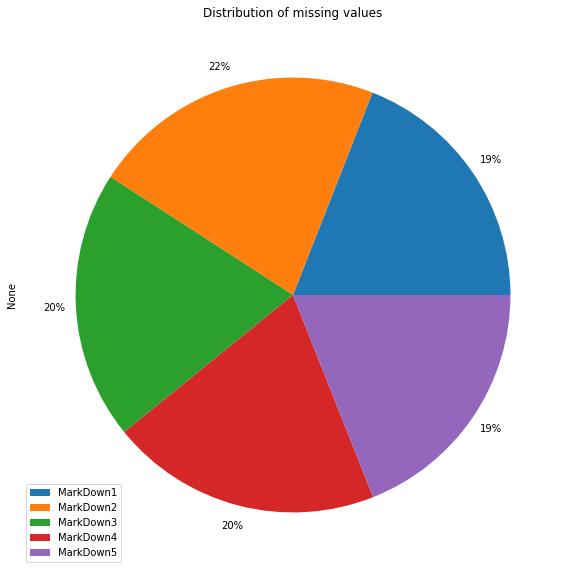

In [12]:
sum_of_missing_values=merged_data.isna().sum()
sum_of_missing_values=sum_of_missing_values[sum_of_missing_values>0]
plt.ylabel("")
plt.title("Distribution of missing values")
sum_of_missing_values.plot.pie(labels=None,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(10,10),legend=True)


MarkDown 1 has maximum number of missing values. All markdowns have missing values while other columns don't have. It makes sense because the markdowns represent discounts given during festivities and there won't be festivals all over the year. 

<AxesSubplot:title={'center':'Representation of various stores'}>

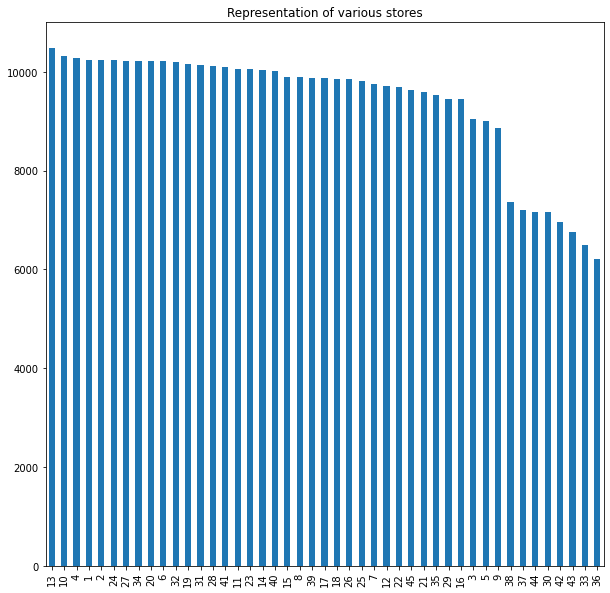

In [13]:
plt.title("Representation of various stores")
merged_data["Store"].value_counts(sort=True).plot.bar(figsize=(10,10))

Store 13 is the most represented store and store 36 is the least represented store. 

<AxesSubplot:title={'center':'Representation of store types'}>

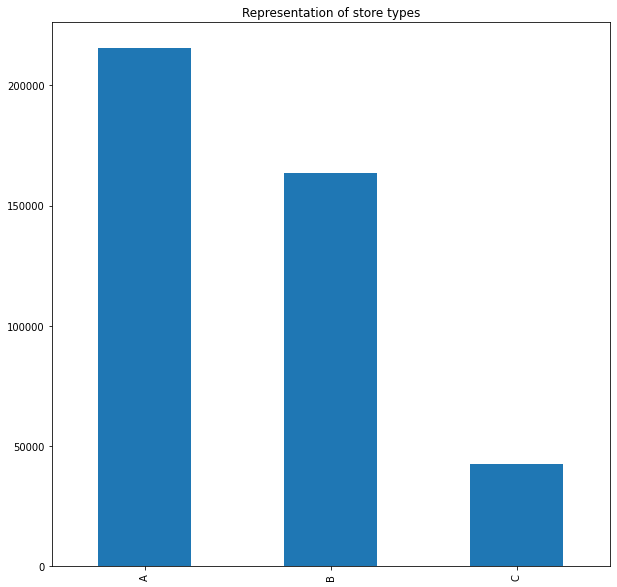

In [14]:
plt.title("Representation of store types")
merged_data["Type"].value_counts(sort=True).plot.bar(figsize=(10,10))

Type A is clearly the most popular store type

In [15]:

avg_weekly_sales = merged_data.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avg_weekly_sales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Finding average sales per store",
             color_discrete_sequence=["lightsalmon"], template='plotly_white')
fig.show()

In [16]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,39.0
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,40.0
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,41.0
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,42.0


In [17]:
merged_data["Month"]

0          2
1          2
2          2
3          2
4          3
          ..
421565     9
421566    10
421567    10
421568    10
421569    10
Name: Month, Length: 421570, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Average Monthly Sales of 2010'>

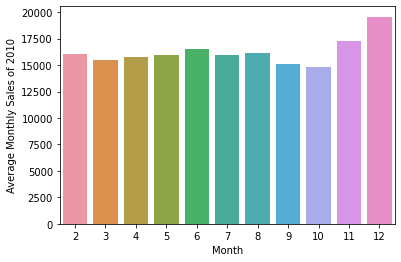

In [18]:
sales2010 = merged_data[(merged_data.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'Average Monthly Sales of 2010'])

sales2011 = merged_data[merged_data.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'Average Monthly Sales of 2011'])

sales2012 = merged_data[merged_data.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'Average Monthly Sales of 2012'])


sns.barplot(data=df2010,x="Month",y="Average Monthly Sales of 2010")




<AxesSubplot:xlabel='Month', ylabel='Average Monthly Sales of 2011'>

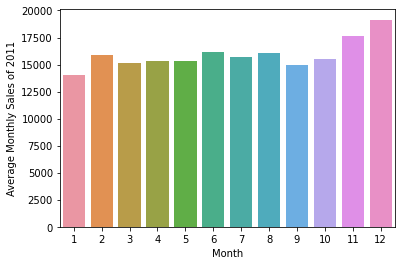

In [19]:
sns.barplot(data=df2011,x="Month",y="Average Monthly Sales of 2011")

<AxesSubplot:xlabel='Month', ylabel='Average Monthly Sales of 2012'>

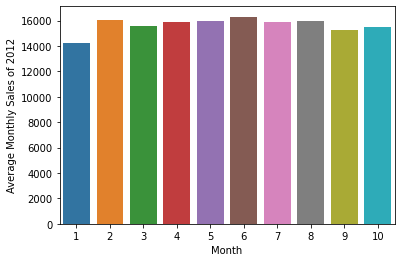

In [20]:

sns.barplot(data=df2012,x="Month",y="Average Monthly Sales of 2012")

In [21]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,39.0
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,40.0
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,41.0
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,42.0


Write Interpretations of Average Monthly Sales Here

<AxesSubplot:>

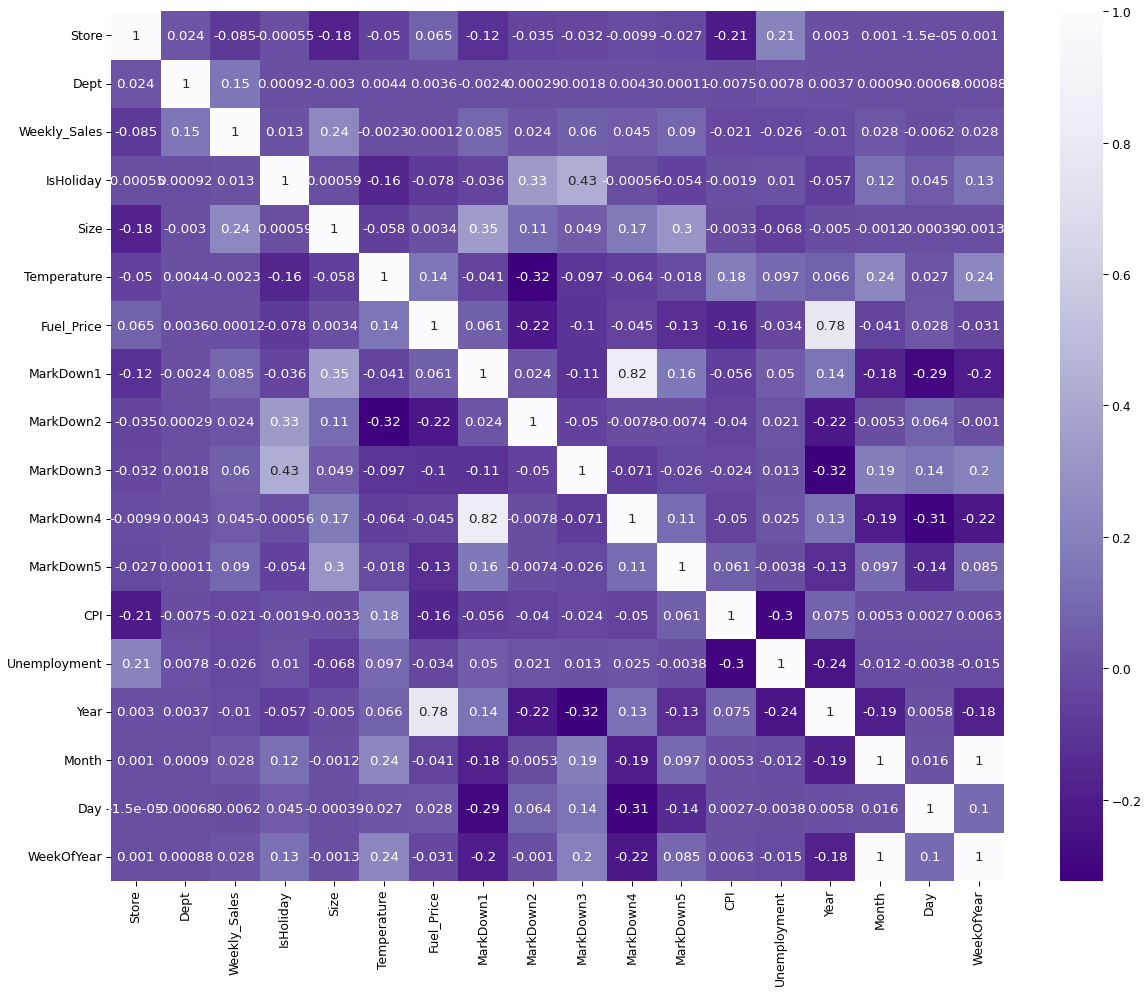

In [22]:
plt.figure(figsize=(20,16))
sns.set_context(context='paper',font_scale=1.4)
correlation=merged_data.loc[:,'Store':'WeekOfYear'].corr()
sns.heatmap(correlation,annot=True,cmap='Purples_r')

In [23]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,39.0
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,40.0
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,41.0
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,42.0


In [24]:
merged_data=merged_data.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)
merged_testing=merged_testing.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)


In [25]:
col_data = list(merged_data.columns)

In [26]:
col_data

['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Year', 'WeekOfYear']

In [27]:
col_data[2], col_data[-1] = col_data[-1], col_data[2]

In [28]:
col_data

['Store', 'Dept', 'WeekOfYear', 'IsHoliday', 'Size', 'Year', 'Weekly_Sales']

In [29]:
merged_data = merged_data[col_data]

In [30]:
merged_data

,Store,Dept,WeekOfYear,IsHoliday,Size,Year,Weekly_Sales
0,1,1,5.0,False,151315,2010,24924.50
1,1,1,6.0,True,151315,2010,46039.49
2,1,1,7.0,False,151315,2010,41595.55
3,1,1,8.0,False,151315,2010,19403.54
4,1,1,9.0,False,151315,2010,21827.90
...,...,...,...,...,...,...,...
421565,45,98,39.0,False,118221,2012,508.37
421566,45,98,40.0,False,118221,2012,628.10
421567,45,98,41.0,False,118221,2012,1061.02
421568,45,98,42.0,False,118221,2012,760.01


In [31]:
X=merged_data.columns.to_list()
columns_for_input=X
columns_for_input.remove('Weekly_Sales')
target_columns= 'Weekly_Sales'

input_dataframe =merged_data[columns_for_input].copy()
target_data=merged_data[target_columns].copy()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged_data[columns_for_input])

input_dataframe[columns_for_input] = scaler.transform(input_dataframe[columns_for_input])
merged_testing[columns_for_input] = scaler.transform(merged_testing[columns_for_input])

In [34]:
target_data

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [35]:
train_X,test_X,train_y,test_y=train_test_split(input_dataframe,target_data,test_size=0.2,random_state=42)

In [36]:
import sklearn

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
random_forest_model_1 = RandomForestRegressor(n_jobs=-1, random_state=42)

random_forest_model_1.fit(train_X, train_y)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
from numpy import sqrt

In [39]:
random_forest_train_preds = random_forest_model_1.predict(train_X)
random_forest_test_preds = random_forest_model_1.predict(test_X)

mse_train_random_forest=mean_squared_error(train_y, random_forest_train_preds)
mse_test_random_forest=mean_squared_error(test_y, random_forest_test_preds)

rmse_train_random_forest=sqrt(mse_train_random_forest)
rmse_test_random_forest=sqrt(mse_test_random_forest)

print("RMSE train random forest=", rmse_train_random_forest)
print("RMSE test random forest=", rmse_test_random_forest)


RMSE train random forest= 1254.2023873161602
RMSE test random forest= 3566.583606682439


# K Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(train_X, train_y)


KNeighborsRegressor(n_neighbors=3)

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds_knn = knn_model.predict(train_X)
test_preds_knn=knn_model.predict(test_X)
mse_train_knn = mean_squared_error(train_y, train_preds_knn)
mse_test_knn = mean_squared_error(test_y,test_preds_knn)
rmse_train_knn = sqrt(mse_train_knn)
rmse_test_knn = sqrt(mse_test_knn)
print("RMSE train KNN =", rmse_train_knn)
print("RMSE test KNN=", rmse_test_knn)


RMSE train KNN = 11386.251833817547
RMSE test KNN= 14485.962894378958


In [42]:
# from sklearn.model_selection import GridSearchCV
# parameters = {"n_neighbors": range(1, 50)}
# gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
# gridsearch.fit(train_X, train_y)
# gridsearch.best_params_


In [43]:
# train_preds_grid = gridsearch.predict(train_X)
# train_mse = mean_squared_error(train_y, train_preds_grid)
# train_rmse = sqrt(train_mse)
# test_preds_grid = gridsearch.predict(test_X)
# test_mse = mean_squared_error(test_y, test_preds_grid)
# test_rmse = sqrt(test_mse)
# train_rmse

# Deep Learning

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(500, input_dim=6, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

2022-05-02 03:36:22.087407: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [46]:
model = Sequential()
model.add(Dense(500, input_dim=6, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [47]:
print(train_X.shape); print(train_y.shape)

(337256, 6)
(337256,)


In [48]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(train_X, train_y, epochs=20)

Epoch 1/20


2022-05-02 03:36:22.346525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


10540/10540 [==============================] - 30s 3ms/step - loss: 466845280.0000 - mean_squared_error: 466845280.0000
Epoch 2/20
10540/10540 [==============================] - 28s 3ms/step - loss: 402074464.0000 - mean_squared_error: 402074464.0000
Epoch 3/20
10540/10540 [==============================] - 28s 3ms/step - loss: 389004896.0000 - mean_squared_error: 389004896.0000
Epoch 4/20
10540/10540 [==============================] - 28s 3ms/step - loss: 386603008.0000 - mean_squared_error: 386603008.0000
Epoch 5/20
10540/10540 [==============================] - 27s 3ms/step - loss: 383587648.0000 - mean_squared_error: 383587648.0000
Epoch 6/20
10540/10540 [==============================] - 27s 3ms/step - loss: 379444288.0000 - mean_squared_error: 379444288.0000
Epoch 7/20
10540/10540 [==============================] - 28s 3ms/step - loss: 374617312.0000 - mean_squared_error: 374617312.0000
Epoch 8/20
10540/10540 [==============================] - 28s 3ms/step - loss: 368777184.0000 

In [49]:
pred_train_ANN= model.predict(train_X)
rmse_train_ANN=np.sqrt(mean_squared_error(train_y,pred_train_ANN))

pred_test_ANN= model.predict(test_X)
rmse_test_ANN=np.sqrt(mean_squared_error(test_y,pred_test_ANN)) 


In [50]:
print("Train RMSE for ANN =", rmse_train_ANN)
print("Test RMSE for ANN=", rmse_test_ANN)

Train RMSE for ANN = 15065.031440147444
Test RMSE for ANN= 15228.660194807184


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0.5, 1.0, 'Random Forest Regressor Predictions')

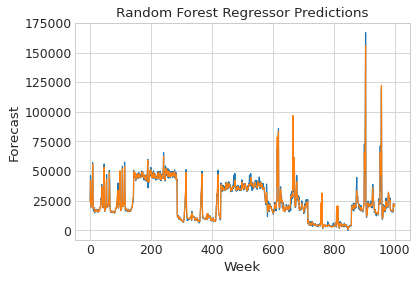

In [52]:
plt.plot(target_data[:1000])
plt.plot(random_forest_model_1.predict(input_dataframe[:1000]))
plt.xlabel("Week")
plt.ylabel("Forecast")
plt.title("Random Forest Regressor Predictions")

Text(0.5, 1.0, 'KNN Regressor Predictions')

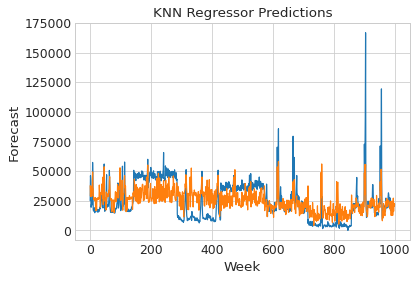

In [53]:
plt.plot(target_data[:1000])
plt.plot(knn_model.predict(input_dataframe[:1000]))
plt.xlabel("Week")
plt.ylabel("Forecast")
plt.title("KNN Regressor Predictions")

Text(0.5, 1.0, 'ANN Predictions')

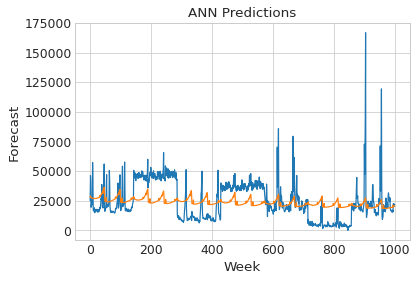

In [54]:
plt.plot(target_data[:1000])
plt.plot(model.predict(input_dataframe[:1000]))
plt.xlabel("Week")
plt.ylabel("Forecast")
plt.title("ANN Predictions")

In [55]:
def print_evaluation_metrics(y_true, y_pred):
    print("Max residual error ", sklearn.metrics.mean_absolute_error(y_true, y_pred))
    print("Mean squared error ", sklearn.metrics.mean_squared_error(y_true, y_pred))
#     print("Mean squared logarithmic error regression loss. ", sklearn.metrics.mean_squared_log_error(y_true, y_pred))
    print("Median absolute error regression loss ", sklearn.metrics.median_absolute_error(y_true, y_pred))
    print("Mean absolute percentage error (MAPE) regression loss. ", sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred))
    print("(coefficient of determination) regression score function. ", sklearn.metrics.r2_score(y_true, y_pred))


# Random Forest Metrics

In [56]:
print_evaluation_metrics(test_y, random_forest_test_preds)

Max residual error  1350.653337318832
Mean squared error  12720518.623455916
Median absolute error regression loss  499.0515499999974
Mean absolute percentage error (MAPE) regression loss.  42775276219755.01
(coefficient of determination) regression score function.  0.9756064693967785


# KNN Metrics

In [57]:
print_evaluation_metrics(test_y, test_preds_knn)

Max residual error  8214.359785247212
Mean squared error  209843120.977324
Median absolute error regression loss  4057.9366666666665
Mean absolute percentage error (MAPE) regression loss.  8649207222639969.0
(coefficient of determination) regression score function.  0.5975938760863839


# ANN Metrics

In [58]:
print_evaluation_metrics(test_y, pred_test_ANN)

Max residual error  9101.789432812746
Mean squared error  231912091.32890478
Median absolute error regression loss  5097.987070312501
Mean absolute percentage error (MAPE) regression loss.  6812818067735763.0
(coefficient of determination) regression score function.  0.5552732664014766


# RNN Implementation

In [152]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, GRU
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [153]:
dataset = merged_data

In [154]:
scaler = MinMaxScaler()

In [155]:
dataset = scaler.fit_transform(dataset)

In [156]:
dataset

array([[0.        , 0.        , 0.07843137, ..., 0.63026734, 0.        ,
        0.04285051],
       [0.        , 0.        , 0.09803922, ..., 0.63026734, 0.        ,
        0.07309739],
       [0.        , 0.        , 0.11764706, ..., 0.63026734, 0.        ,
        0.06673152],
       ...,
       [1.        , 0.98979592, 0.78431373, ..., 0.45113588, 1.        ,
        0.00866647],
       [1.        , 0.98979592, 0.80392157, ..., 0.45113588, 1.        ,
        0.00823528],
       [1.        , 0.98979592, 0.82352941, ..., 0.45113588, 1.        ,
        0.00868907]])

In [157]:
dataset.shape

(421570, 7)

In [158]:
def split_sequence(sequence, n_steps):
    """function that splits a dataset sequence into input data and
    labels"""
    X, Y = [], []
    for i in range(sequence.shape[0]):
        if (i + n_steps) >= sequence.shape[0]:
            break
      # Divide sequence between data (input) and labels (output)
        seq_X, seq_Y = sequence[i: i + n_steps, :7], sequence[i + n_steps, -1]
        X.append(seq_X)
        Y.append(seq_Y)
    return np.array(X), np.array(Y)

In [159]:
dataset_size = dataset.shape[0]
x_train, y_train = split_sequence(dataset[0: round(0.8 * dataset_size)], 13)
x_val, y_val = split_sequence(dataset[round(0.8 * dataset_size):], 13)

In [160]:
y_val.shape

(84301,)

In [161]:
import tensorflow as tf

In [162]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_val = np.asarray(x_val).astype('float32')
y_val = np.asarray(y_val).astype('float32')


In [163]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(337243, 13, 7)
(337243,)
(84301, 13, 7)
(84301,)


In [164]:
batch_size = 256
buffer_size = x_train.shape[0]
# Provide an infinite dataset
train_iterator = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size).batch(batch_size).repeat()
# Provide an infinite dataset
val_iterator = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size).repeat()

In [165]:
y_train.shape

(337243,)

In [166]:
indices = y_train > 0.04

In [167]:
select_y = y_train[indices]

In [168]:
y_train.shape[0]/select_y.shape[0]

4.32091378492998

In [169]:
y_train_combined = np.append(y_train[:round(0.5*y_train.size)], select_y, axis=0)

In [170]:
y_train_combined.shape

(246671,)

In [171]:
x_train_combined = np.append(x_train[:round(0.5*y_train.size), :, :], x_train[indices, :, :], axis=0)

In [172]:
x_train_combined.shape

(246671, 13, 7)

In [173]:
# Provide an infinite dataset
buffer_size_mod = y_train.size
train_iterator_mod = tf.data.Dataset.from_tensor_slices((x_train_combined, y_train_combined)).shuffle(buffer_size_mod).batch(batch_size).repeat()

In [174]:
def plot_3(future, prediction, title):
    days = list(range(1, future.shape[0] + 1))
    plt.figure(figsize=(12, 6))
    plt.plot(days, future, 'o-', markersize=5, mfc='none', 
    label='Labels')
    plt.plot(days, prediction, 'o-', markersize=5, mfc='none', 
    label='Predictions')
    plt.title(title)
    plt.xlim([days[0], days[-1]])
    plt.xlabel('Weeks')
    plt.ylabel('Sales (Standardized data)')
    plt.legend()

## LSTM model

In [175]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [176]:
epochs = 10
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

Epoch 1/10
800/800 [==============================] - 69s 80ms/step - loss: 4.0835e-04 - val_loss: 1.1334e-04
Epoch 2/10
800/800 [==============================] - 63s 79ms/step - loss: 1.6175e-04 - val_loss: 1.0314e-04
Epoch 3/10
800/800 [==============================] - 63s 79ms/step - loss: 1.4585e-04 - val_loss: 9.9153e-05
Epoch 4/10
800/800 [==============================] - 64s 80ms/step - loss: 1.2194e-04 - val_loss: 9.7724e-05
Epoch 5/10
800/800 [==============================] - 64s 80ms/step - loss: 1.1605e-04 - val_loss: 1.0795e-04
Epoch 6/10
800/800 [==============================] - 63s 79ms/step - loss: 1.1479e-04 - val_loss: 9.7110e-05
Epoch 7/10
800/800 [==============================] - 81s 101ms/step - loss: 1.0524e-04 - val_loss: 9.3033e-05
Epoch 8/10
800/800 [==============================] - 81s 102ms/step - loss: 1.1349e-04 - val_loss: 9.5085e-05
Epoch 9/10
800/800 [==============================] - 76s 94ms/step - loss: 1.0727e-04 - val_loss: 9.0488e-05
Epoch 10

In [177]:
from sklearn.metrics import r2_score

In [178]:
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    print(y.numpy().size,  model.predict(x).reshape(-1).size)

256 256
256 256
256 256
256 256
256 256


In [ ]:
string = 'LSTM Predictions (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    title = string.format(batch_num)
    plot_3(y.numpy(), model.predict(x).reshape(-1), title)
#     print(y.numpy(), model.predict(x).reshape(-1), title)

    batch_num += 1

In [180]:
r2_score(y_val, model.predict(x_val).reshape(-1))

0.9155379535723414

## Simple RNN Model

In [181]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')

In [182]:
epochs = 10
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = rnn_model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

Epoch 1/10
800/800 [==============================] - 36s 39ms/step - loss: 0.0273 - val_loss: 1.5262e-04
Epoch 2/10
800/800 [==============================] - 31s 39ms/step - loss: 0.0021 - val_loss: 1.2088e-04
Epoch 3/10
800/800 [==============================] - 30s 37ms/step - loss: 9.2658e-04 - val_loss: 1.0349e-04
Epoch 4/10
800/800 [==============================] - 37s 47ms/step - loss: 5.4824e-04 - val_loss: 1.5990e-04
Epoch 5/10
800/800 [==============================] - 38s 48ms/step - loss: 3.4585e-04 - val_loss: 1.0216e-04
Epoch 6/10
800/800 [==============================] - 37s 46ms/step - loss: 2.6453e-04 - val_loss: 1.2081e-04
Epoch 7/10
800/800 [==============================] - 38s 48ms/step - loss: 2.1951e-04 - val_loss: 1.0217e-04
Epoch 8/10
800/800 [==============================] - 37s 46ms/step - loss: 1.6498e-04 - val_loss: 1.1248e-04
Epoch 9/10
800/800 [==============================] - 35s 43ms/step - loss: 1.4354e-04 - val_loss: 1.0522e-04
Epoch 10/10
800/80

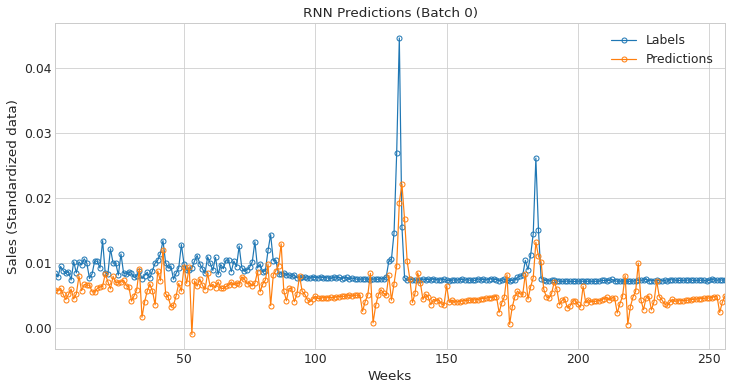

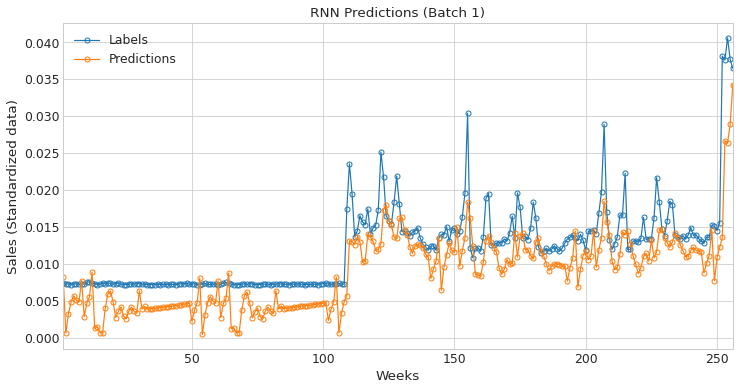

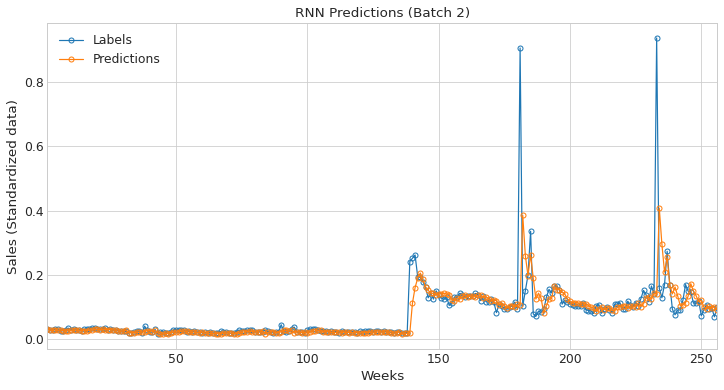

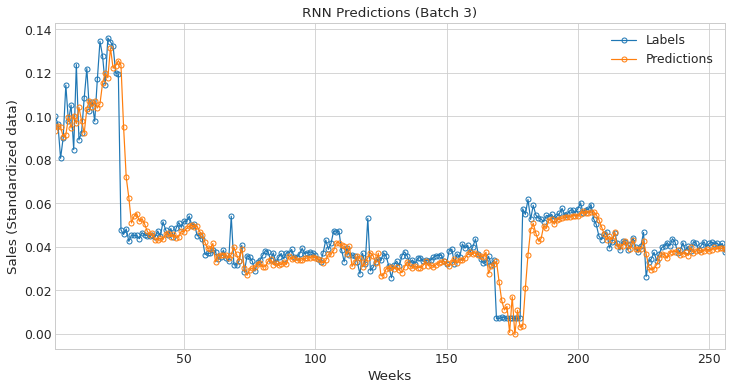

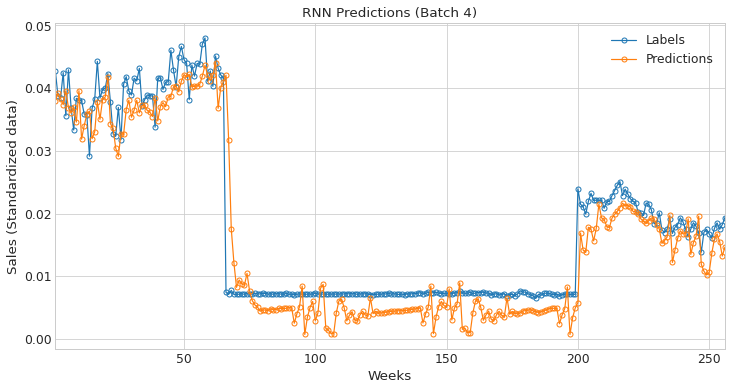

In [183]:
string = 'RNN Predictions (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    title = string.format(batch_num)
    plot_3(y.numpy(), rnn_model.predict(x).reshape(-1), title)
#     print(y.numpy(), model.predict(x).reshape(-1), title)

    batch_num += 1

In [184]:
r2_score(y_val, rnn_model.predict(x_val).reshape(-1))

0.9038041922564677

## GRU

In [185]:
GRU_model = Sequential()
GRU_model.add(GRU(150, return_sequences=True))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(100))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(1))
GRU_model.compile(loss='mean_squared_error', optimizer='adam')

In [186]:
epochs = 20
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = GRU_model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

Epoch 1/20
800/800 [==============================] - 81s 94ms/step - loss: 8.6656e-04 - val_loss: 1.0032e-04
Epoch 2/20
800/800 [==============================] - 76s 95ms/step - loss: 1.8444e-04 - val_loss: 1.0157e-04
Epoch 3/20
800/800 [==============================] - 89s 112ms/step - loss: 1.4353e-04 - val_loss: 1.0108e-04
Epoch 4/20
800/800 [==============================] - 96s 121ms/step - loss: 1.3743e-04 - val_loss: 9.8528e-05
Epoch 5/20
800/800 [==============================] - 90s 112ms/step - loss: 1.2276e-04 - val_loss: 9.7408e-05
Epoch 6/20
800/800 [==============================] - 75s 93ms/step - loss: 1.1060e-04 - val_loss: 9.6033e-05
Epoch 7/20
800/800 [==============================] - 74s 92ms/step - loss: 1.1111e-04 - val_loss: 8.9962e-05
Epoch 8/20
800/800 [==============================] - 75s 93ms/step - loss: 1.0671e-04 - val_loss: 9.1745e-05
Epoch 9/20
800/800 [==============================] - 77s 96ms/step - loss: 1.0179e-04 - val_loss: 1.0129e-04
Epoch 1

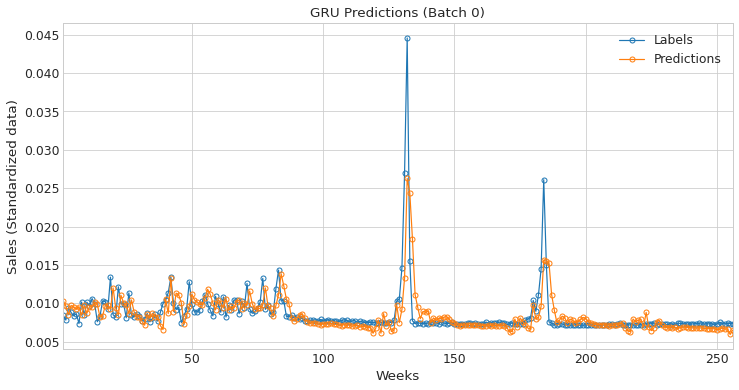

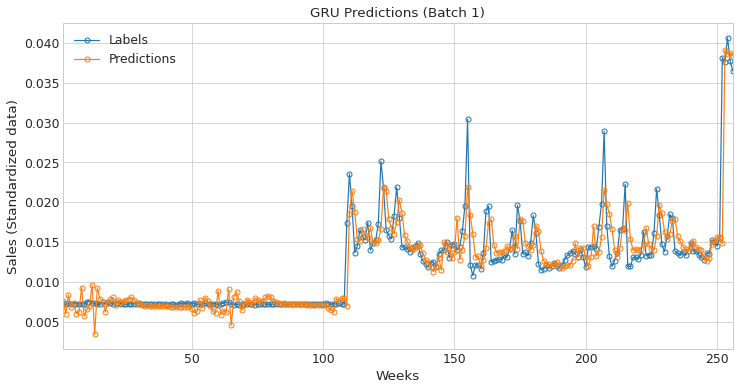

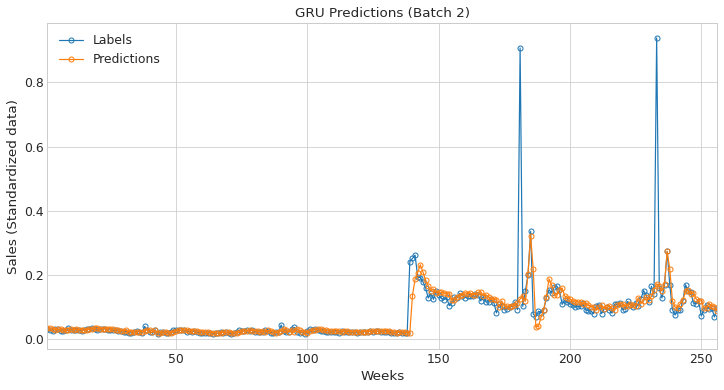

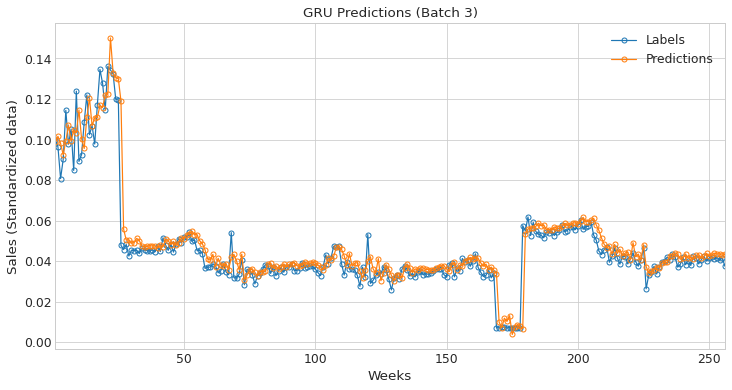

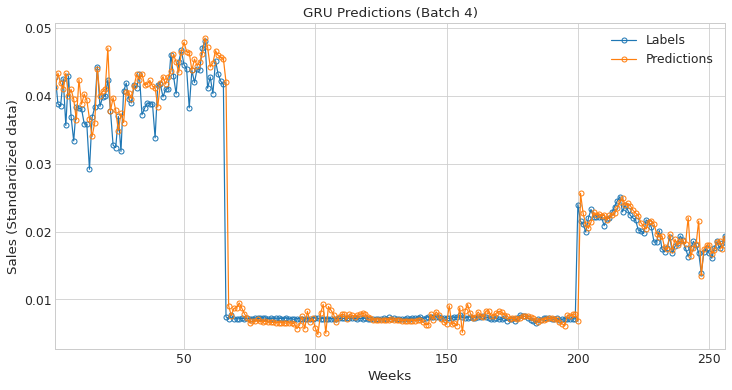

In [187]:
string = 'GRU Predictions (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    title = string.format(batch_num)
    plot_3(y.numpy(), GRU_model.predict(x).reshape(-1), title)
#     print(y.numpy(), model.predict(x).reshape(-1), title)

    batch_num += 1

In [188]:
r2_score(y_val, GRU_model.predict(x_val).reshape(-1))

0.9345943803145788

# Model Improvement for GRU

In [189]:
history = GRU_model.fit(train_iterator_mod, epochs=5,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

Epoch 1/5
800/800 [==============================] - 76s 94ms/step - loss: 1.4159e-04 - val_loss: 8.9056e-05
Epoch 2/5
800/800 [==============================] - 76s 95ms/step - loss: 1.3054e-04 - val_loss: 7.9302e-05
Epoch 3/5
800/800 [==============================] - 75s 94ms/step - loss: 1.3844e-04 - val_loss: 9.1899e-05
Epoch 4/5
800/800 [==============================] - 76s 95ms/step - loss: 1.3135e-04 - val_loss: 7.2767e-05
Epoch 5/5
800/800 [==============================] - 77s 97ms/step - loss: 1.2525e-04 - val_loss: 7.0831e-05


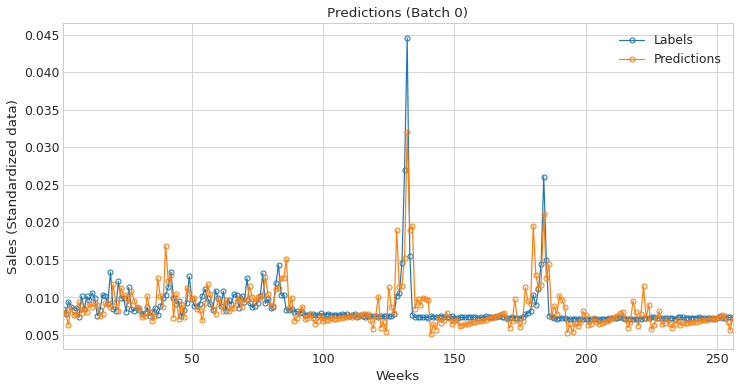

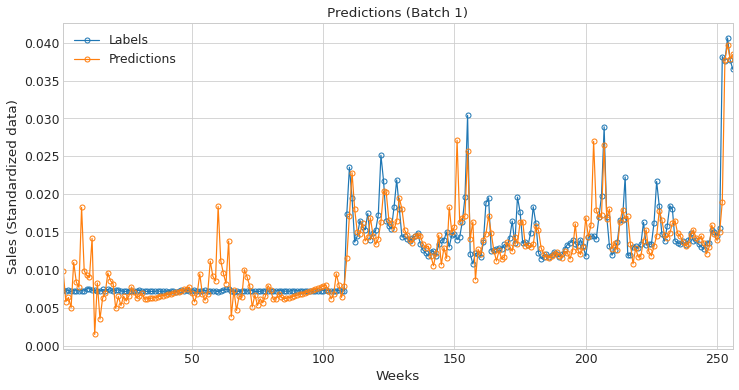

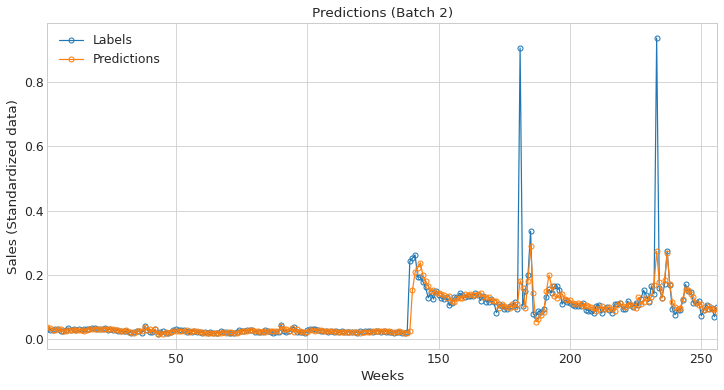

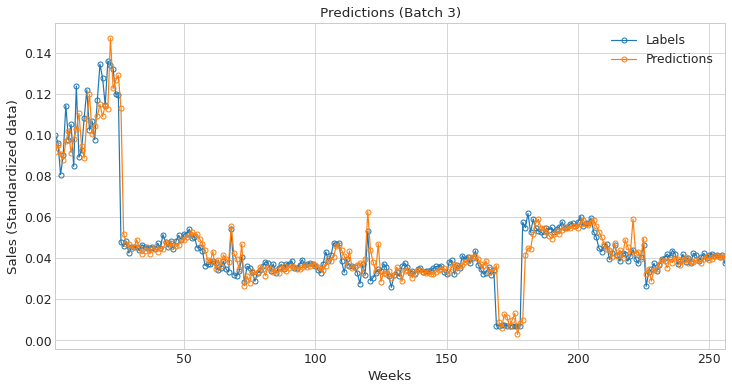

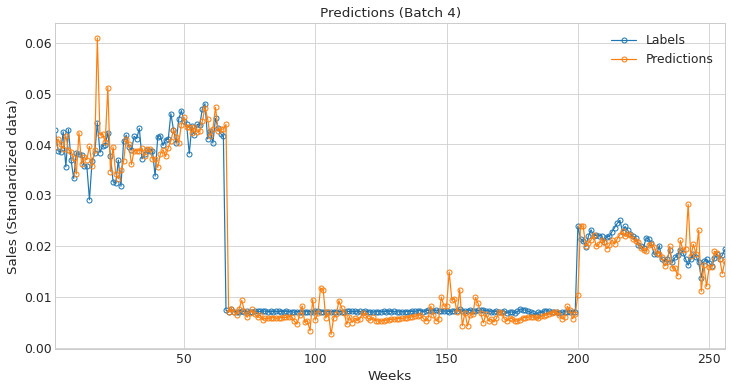

In [190]:
string = 'Predictions (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    title = string.format(batch_num)
    plot_3(y.numpy(), GRU_model.predict(x).reshape(-1), title)
#     print(y.numpy(), model.predict(x).reshape(-1), title)

    batch_num += 1

In [191]:
r2_score(y_val, GRU_model.predict(x_val).reshape(-1))

0.9388737372967388

# GRU model trained from a scratch in the new dataset

In [192]:
GRU_modified_model = Sequential()
GRU_modified_model.add(GRU(150, return_sequences=True))
GRU_modified_model.add(Dropout(0.2))
GRU_modified_model.add(GRU(70))
GRU_modified_model.add(Dropout(0.3))
GRU_modified_model.add(Dense(1))
GRU_modified_model.compile(loss='mean_squared_error', optimizer='adam')

In [194]:
epochs = 25
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = GRU_modified_model.fit(train_iterator_mod, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

Epoch 1/25
800/800 [==============================] - 77s 89ms/step - loss: 7.5139e-04 - val_loss: 1.3211e-04
Epoch 2/25
800/800 [==============================] - 71s 89ms/step - loss: 2.6955e-04 - val_loss: 1.4867e-04
Epoch 3/25
800/800 [==============================] - 72s 90ms/step - loss: 2.2974e-04 - val_loss: 1.0158e-04
Epoch 4/25
800/800 [==============================] - 70s 88ms/step - loss: 2.2233e-04 - val_loss: 9.7671e-05
Epoch 5/25
800/800 [==============================] - 71s 89ms/step - loss: 2.0732e-04 - val_loss: 1.0875e-04
Epoch 6/25
800/800 [==============================] - 71s 89ms/step - loss: 1.9791e-04 - val_loss: 9.7054e-05
Epoch 7/25
800/800 [==============================] - 74s 92ms/step - loss: 1.8807e-04 - val_loss: 1.0350e-04
Epoch 8/25
800/800 [==============================] - 71s 89ms/step - loss: 1.8822e-04 - val_loss: 1.0300e-04
Epoch 9/25
800/800 [==============================] - 72s 91ms/step - loss: 1.7257e-04 - val_loss: 1.1688e-04
Epoch 10/2

In [203]:
history = GRU_modified_model.fit(train_iterator, epochs=1,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

800/800 [==============================] - 71s 88ms/step - loss: 6.4504e-05 - val_loss: 3.6568e-05


In [218]:
history = GRU_modified_model.fit(train_iterator, epochs=1,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_iterator,
                    validation_steps=validation_steps)

800/800 [==============================] - 72s 89ms/step - loss: 5.0777e-05 - val_loss: 3.5217e-05


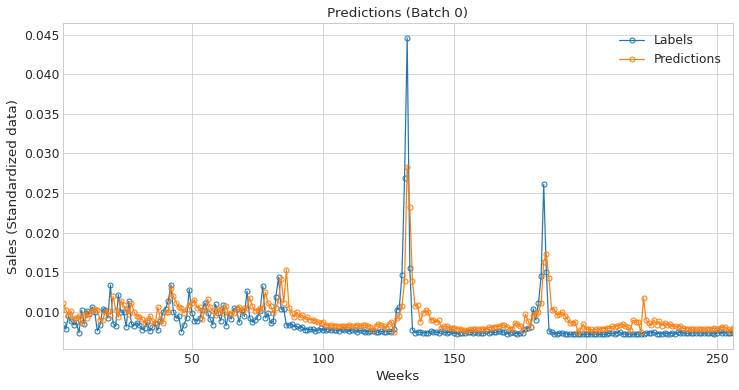

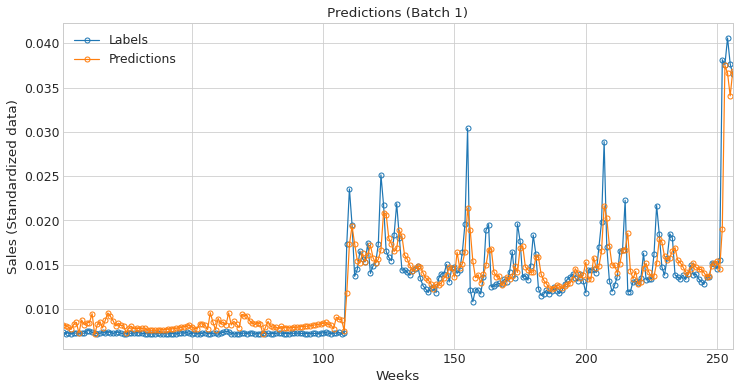

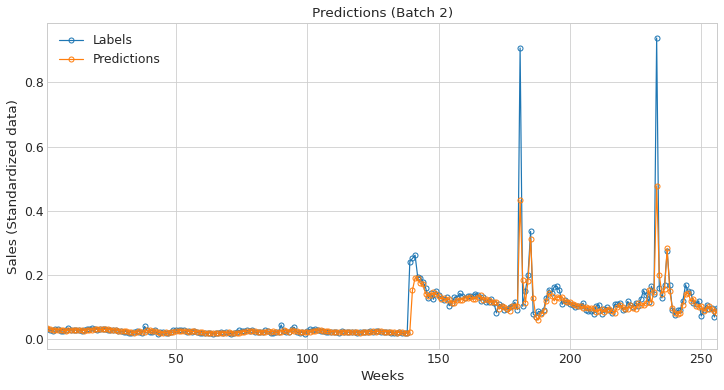

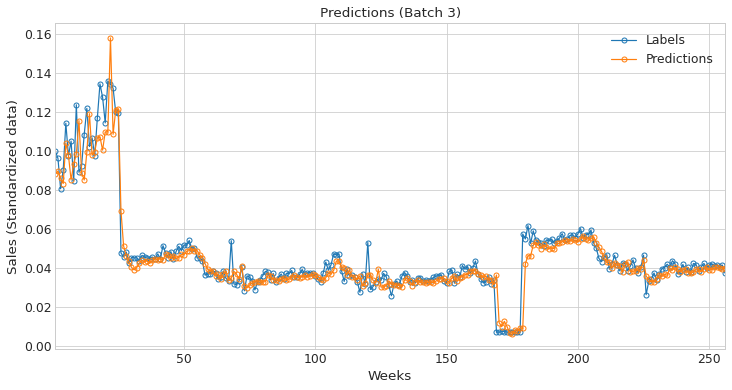

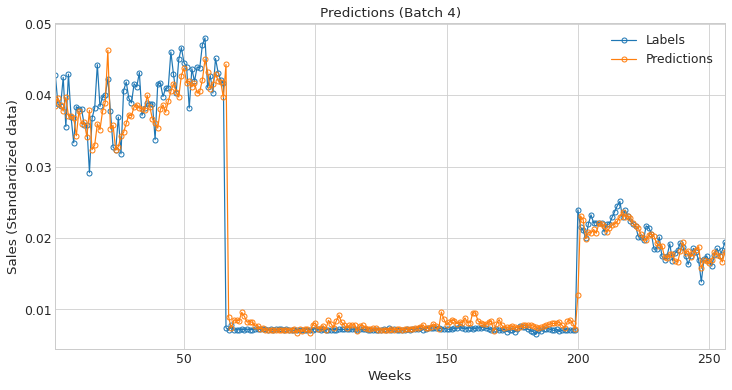

In [224]:
string = 'Predictions (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(5)):
    title = string.format(batch_num)
    plot_3(y.numpy(), GRU_modified_model.predict(x).reshape(-1), title)
#     print(y.numpy(), model.predict(x).reshape(-1), title)

    batch_num += 1

In [200]:
r2_score(y_val, GRU_modified_model.predict(x_val).reshape(-1))

0.9451940487455199

In [211]:
r2_score(y_val, GRU_modified_model.predict(x_val).reshape(-1))

0.967209000012669

In [215]:
r2_score(y_val, GRU_modified_model.predict(x_val).reshape(-1))

0.9659046295866552